<a href="https://colab.research.google.com/github/Sharanya5056/Samsung_Innovation_Campus/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the diabetes dataset
diabetes = load_diabetes(as_frame=True)
X = diabetes.data
y = diabetes.target

# Combine features and target for easier initial inspection
diabetes_df = pd.concat([X, y], axis=1)

# Display the first few rows
display(diabetes_df.head())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Importing the dataset
# df = pd.read_csv(datalink,delimiter=',') # This line caused the error as datalink was not defined
df = diabetes_df # Use the existing diabetes_df DataFrame
display(df.describe())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


Text(0.5, 1.0, 'Distribution of BMI colored by Target Median')

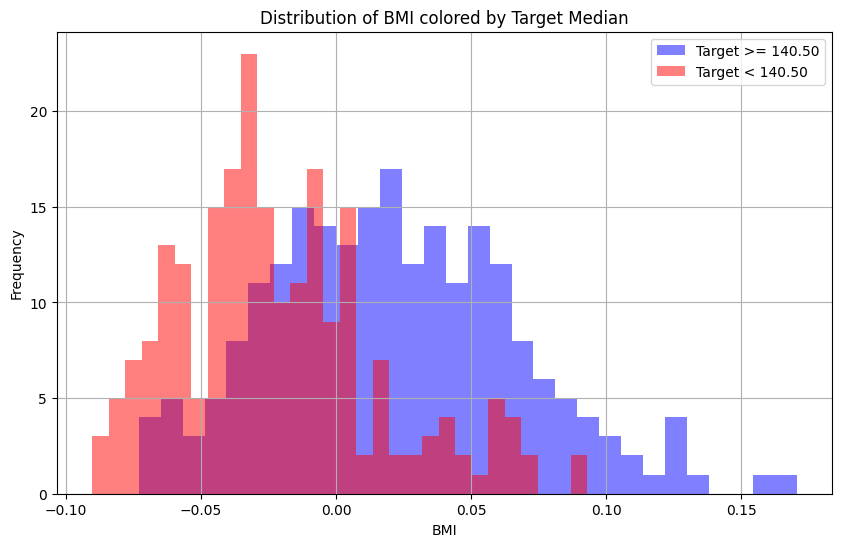

In [8]:
# Creating a histogram of BMI, colored by target median
plt.figure(figsize=(10,6))
median_target = df['target'].median()
df[df['target'] >= median_target]['bmi'].hist(alpha=0.5,color='blue',  bins=30,label=f'Target >= {median_target:.2f}')
df[df['target'] < median_target]['bmi'].hist(alpha=0.5,color='red', bins=30,label=f'Target < {median_target:.2f}')
plt.legend()
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI colored by Target Median')

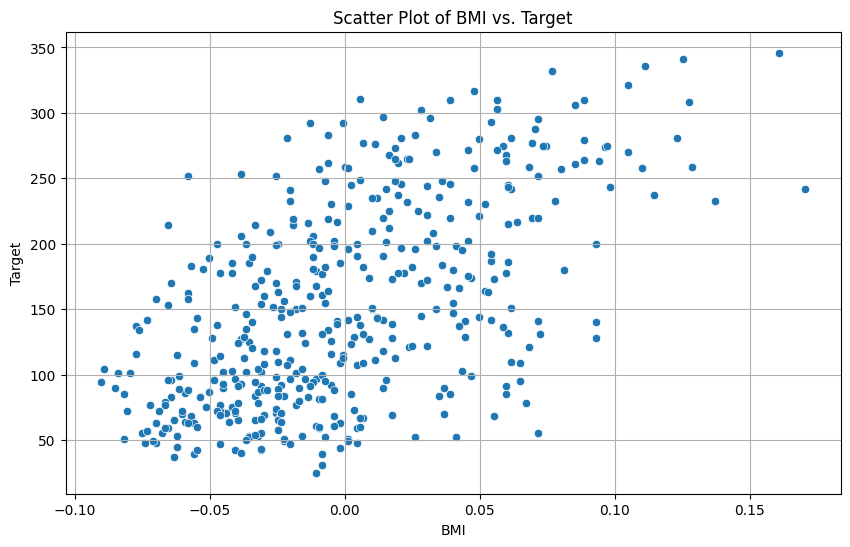

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='target', data=df)
plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('Scatter Plot of BMI vs. Target')
plt.grid(True)
plt.show()

In [14]:
cat_feats = ['purpose']

In [16]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = diabetes_df.drop('target', axis=1)
y = diabetes_df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (353, 10)
Testing features shape: (89, 10)
Training target shape: (353,)
Testing target shape: (89,)


In [17]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

print("Decision Tree Regressor model trained successfully.")

Decision Tree Regressor model trained successfully.


In [20]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:

predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        37.0       0.00      0.00      0.00       1.0
        42.0       0.00      0.00      0.00       1.0
        48.0       0.00      0.00      0.00       2.0
        51.0       0.00      0.00      0.00       0.0
        52.0       0.00      0.00      0.00       2.0
        58.0       0.00      0.00      0.00       0.0
        59.0       0.00      0.00      0.00       0.0
        60.0       0.00      0.00      0.00       1.0
        61.0       0.00      0.00      0.00       1.0
        63.0       0.00      0.00      0.00       2.0
        64.0       0.00      0.00      0.00       1.0
        65.0       0.00      0.00      0.00       0.0
        67.0       0.00      0.00      0.00       1.0
        68.0       0.00      0.00      0.00       1.0
        69.0       0.00      0.00      0.00       1.0
        70.0       0.00      0.00      0.00       1.0
        71.0       0.00      0.00      0.00       0.0
        72.0       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [22]:
print(confusion_matrix(y_test,predictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [24]:
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        37.0       0.00      0.00      0.00       1.0
        40.0       0.00      0.00      0.00       0.0
        42.0       0.00      0.00      0.00       1.0
        43.0       0.00      0.00      0.00       0.0
        48.0       0.00      0.00      0.00       2.0
        49.0       0.00      0.00      0.00       0.0
        51.0       0.00      0.00      0.00       0.0
        52.0       0.00      0.00      0.00       2.0
        53.0       0.00      0.00      0.00       0.0
        55.0       0.00      0.00      0.00       0.0
        58.0       0.00      0.00      0.00       0.0
        59.0       0.00      0.00      0.00       0.0
        60.0       0.00      0.00      0.00       1.0
        61.0       0.00      0.00      0.00       1.0
        63.0       0.00      0.00      0.00       2.0
        64.0       0.00      0.00      0.00       1.0
        65.0       0.00      0.00      0.00       0.0
        66.0       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [25]:
print(confusion_matrix(y_test,predictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
